# Анализ сервиса аренды самокатов GoFast

**Нам передали данные сервиса аренды самокатов GoFast о некоторых пользователях из нескольких городов, а также об их поездках. Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.  
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться без подписки и с подпиской Ultra.**  

**В основных данных есть информация о пользователях, их поездках и подписках:  
Пользователи — users_go.csv  
Поездки — rides_go.csv  
Подписки — subscriptions_go.csv**  

Цели проекта:  
1. Проанализировать полученные данные;   
2. Проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Для достижения целей необходимо выполнить следующие задачи:
1. Загрузка данных  
  1.1 Считать CSV-файлы с данными с помощью библиотеки pandas и сохранить их в датафреймы  
  1.2 Вывести первые строки каждого набора данных. Изучить общую информацию о каждом датафрейме
2. Предобработка данных  
  2.1 Привести столбец date к типу даты pandas  
  2.2 Создать новый столбец с номером месяца на основе столбца date  
  2.3 Проверить наличие пропущенных значений в датафреймах. Обработать их, если такие значения присутствуют  
  2.4 Проверить наличие дубликатов в датафреймах. Обработать их, если такие значения присутствуют  
3. Исследовательский анализ данных  
  Описать и визуализируем общую информацию о пользователях и поездках по следующим пунктам:   
  3.1 Частота встречаемости городов  
  3.2 Соотношение пользователей с подпиской и без подписки  
  3.3 Возраст пользователей  
  3.4 Расстояние, которое пользователь преодолел за одну поездку  
  3.5 Продолжительность поездок  
4. Объединение данных  
  4.1 Объединить данные о пользователях, поездках и подписках в один датафрейм  
  4.2 Создадать ещё два датафрейма из датафрейма, созданного на этапе 4.1 (данные о пользователях без подписки и данные о пользователях с подпиской)  
  4.3 Визуализировать информацию о расстоянии и времени поездок для пользователей обеих категорий  
5. Подсчет выручки  
  5.1 Создадать датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4  
  5.2 В этот же датафрейм добавить столбец с помесячной выручкой, которую принес каждый пользователь  
6. Проверка гипотез  
  Проверть следующие гипотезы:  
  6.1 Тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании  
  6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?  
  6.3 Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки  
  6.4 Тест на проверку гипотезы о количестве обращений в техподдержку до и после обновлений
7. Общий вывод  

**Импорт библиотек**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

### Загрузка данных

**1.1 Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы**

In [2]:
users = pd.read_csv('/datasets/users_go.csv') #датафрейм с информацией о пользователях, их поездках и подписках.

In [3]:
rides = pd.read_csv('/datasets/rides_go.csv') #датафрейм с данными о поездках

In [4]:
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv') #датафрейм с данными о типах подписки

**1.2 Выведем первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме**

In [5]:
users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Датафрейм с информацией о пользователях содержит 1565 строк и 5 столбцов, содержащих уникальный номер пользователя, имя, возраст, город, тип подписки.

In [7]:
rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [8]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Датафрейм с информацией о поездках содержит 18068 строк и 4 столбца, содержащих уникальный номер пользователя, расстояние поездки (в метрах), время, затраченное на поездку (в минутах), дату совершения поездки.

In [9]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [10]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Датафрейм с информацией о типах подписки содержит 2 строки и 4 столбца, содержащих тип подписки, цену за минуту поездки, цену за старт поездки, стоимость подписки.

**Вывод:** были получены три датафрейма с данными о пользователях, поездках и типах подписки. На данном этапе аномалий не выявлено

### Предобработка данных

**2.1 Приведем столбец date к типу даты pandas**

In [11]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

In [12]:
rides.info() #проверим, применились ли изменения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


**2.2 Создадим новый столбец с номером месяца на основе столбца date**

In [13]:
rides['month'] = rides['date'].dt.to_period('M') #проверим за какой период у нас данные, приведем столбец с месяцами к значению 'год-месяц'

In [14]:
rides['month'].unique() #рассмотрим количество уникальных значений

<PeriodArray>
['2021-01', '2021-04', '2021-08', '2021-10', '2021-11', '2021-12', '2021-03',
 '2021-06', '2021-07', '2021-02', '2021-05', '2021-09']
Length: 12, dtype: period[M]

Уникальных значений 12: на каждый месяц 2021 года, значит можно привести этот столбец к значению "номер месяца"

In [15]:
rides['month'] = rides['date'].dt.month

In [16]:
rides.head() #проверим, появился ли столбец в датафрейме

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


**2.3 Проверим наличие пропущенных значений в датафреймах. Обработаем их, если такие значения присутствуют**

Выведем количество пропущенных значений для каждого столбца каждого датафрейма

In [17]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [18]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [19]:
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропусков не выявлено

**2.4 Проверим наличие дубликатов в датафреймах. Обработаем их, если такие значения присутствуют**

Проверим, есть ли в датафреймах явные дубликаты

In [20]:
users.duplicated().sum()

31

В датафрейме с информацией о пользователях 31 явный дубликат. Выведем таблицу дубликатов и проверим, совпадают ли индексы с user_id, чтобы убедиться, что это действительно дубликаты, а не совпадающая информация по разным пользователям

In [21]:
duplicated_users = users[users.duplicated()]
duplicated_users

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


Индексация и user_id не совпадают. Возможно, на появление дубликатов повлиял технический фактор, и они возникли на этапе загрузки или выгрузки данных, или из-за неправильного запроса или объединения таблиц. Удалим дубликаты

In [22]:
users = users.drop_duplicates().reset_index(drop=True) 

In [23]:
users.info() #выведем информацию по датафрейму

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 60.0+ KB


In [24]:
users.duplicated().sum()

0

In [25]:
rides.duplicated().sum()

0

In [26]:
subscriptions.duplicated().sum()

0

Больше явных дубликатов не наблюдается

Проводить проверку на неявные дубликаты нецелесообразно, т.к. в столбцах с именами пользователей, возрастом и городами так или иначе могут появляться повторы, не являющиеся дубликатами

**Вывод:** На этапе предобработки данных были найдены, изучены и, по возможности, устранены пропуски, дубликаты, преобразованы типы данных. Данные готовы для дальнейшего изучения.

### Исследовательский анализ данных

**Опишем и визуализируем общую информацию о пользователях и поездках**

**3.1 Частота встречаемости городов**

In [27]:
users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

В представленных датафреймах можем наблюдать данные о пользователях из 8 городов. Максимальное количество пользователей (219) из Пятигорска, второй по численности (204) - Екатеринбург. Минимальное количество пользователей (168) из Москвы.  
Рассмотрим данные в виде гистограммы

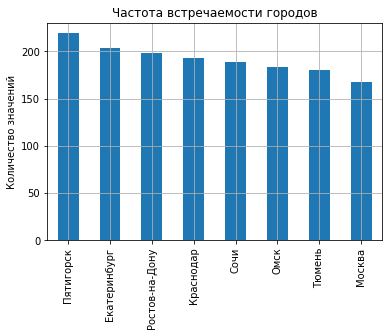

In [28]:
users['city'].value_counts().plot(kind='bar', grid=True) #выведем гистограмму
plt.title('Частота встречаемости городов')
plt.ylabel('Количество значений')
plt.show()

**3.2 Соотношение пользователей с подпиской и без подписки**

In [29]:
users['subscription_type'].value_counts() #посчитаем уникальные значения

free     835
ultra    699
Name: subscription_type, dtype: int64

Большая часть пользователей без подписки, их 835, пользователей с подпиской меньше - 699

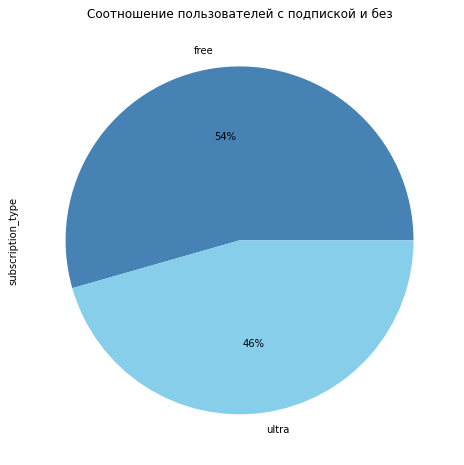

In [30]:
#выведем круговую диаграмму с процентным соотношением
users['subscription_type'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize= (8,8),
 colors = ['steelblue', 'skyblue'],
 title ='Соотношение пользователей с подпиской и без')  
plt.show()

Пользователей без подписки 54%, пользователей с подпиской 46%.

**3.3 Возраст пользователей**

In [31]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Минимальный возраст пользователя 12 лет, максимальный - 43 года. По медиане (25) и среднему (24,9) видим, что возраст большей части пользователей - около 25 лет

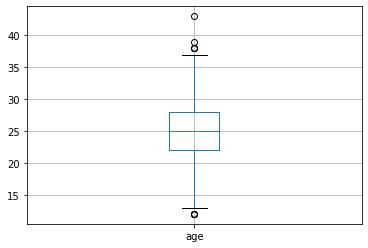

In [32]:
users.boxplot('age') #выведем диаграмму размаха
plt.show()

На диаграмме размаха видны незначительные выбросы, они не аномальны, поэтому их можно не удалять

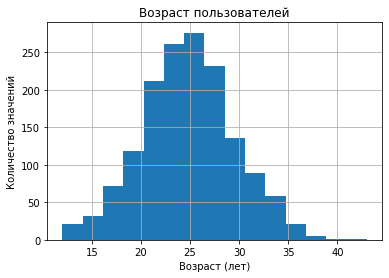

In [33]:
users.hist('age', bins=15) #выведем гистограмму
plt.title('Возраст пользователей')
plt.ylabel('Количество значений')
plt.xlabel('Возраст (лет)')
plt.show()

Возраст пользователей на гистограмме распределен нормально, здесь также видно, что большинству пользователей около 25 лет, вторая по численности группа - 23-24 года. Меньше всего пользователей возраста около 40 и выше лет

**3.4 Расстояние, которое пользователь преодолел за одну поездку**

In [34]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

Мы наблюдаем среднее (3070 м) и медиану (3133 м) на схожих значениях, значит большинство пользователей совершает поезки в пределах 3000 м. Максимальное значение (7211 м) тоже не выглядит странным, такое расстояние при желании можно проделать и пешком. Выбивается минимальное значение в 0.85 м. Возможно, оно появилось из-за того, что пользователь начал поезку, но передумал или самокат был неисправен

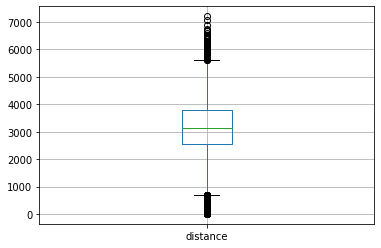

In [35]:
rides.boxplot('distance') #выведем диаграмму размаха
plt.show()

На диаграмме размаха также заметна медиана чуть больше значения 3000 м, и выбросы. Для более точного анализа устранять выбросы не будем

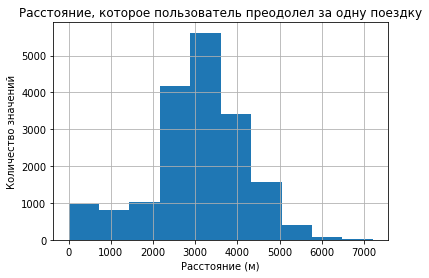

In [36]:
rides.hist('distance') #выведем гистограмму
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.ylabel('Количество значений')
plt.xlabel('Расстояние (м)')
plt.show()

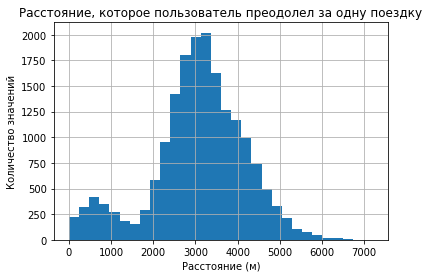

In [37]:
rides.hist('distance', bins=30) #выведем гистограмму
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.ylabel('Количество значений')
plt.xlabel('Расстояние (м)')
plt.show()

По гистограмме видно, что данные распределены нормально в двух областях - от 0 до 1500 м и от 1500 до 7000 м. В первом случае большая часть значений приходится на область около 500 м, во втором - на область чуть больше 3000 м

**3.5 Продолжительность поездок**

In [38]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

В среднем пользователи тратят на поездку 17-18 минут (среднее 17.8, медиана 17,6). Минимальное значение - 0.5 минуты, т.е. 30 секунд, что вполне коррелирует с данными о растоянии в 0.8 м. Максимальное значение 40 минут, что также связано с поездками длиннее 7000 м

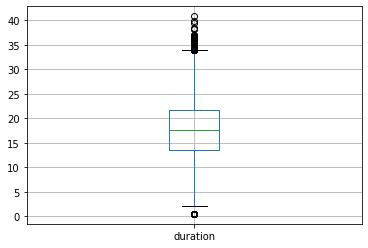

In [39]:
rides.boxplot('duration') #выведем диаграмму размаха
plt.show()

На диаграмме размаха мы наблюдаем медиану в значении около 17-18 минут, большая часть значений лежит в области от 13 до 22 минут, есть выбросы, близкий к нулевому значению, скорее всего, связан с быстрым окончанием поездки, как мы предположили ранее

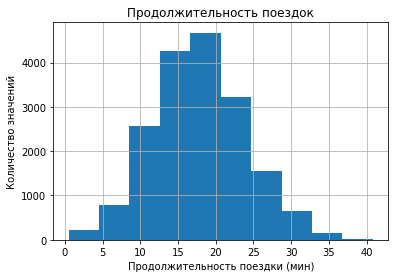

In [40]:
rides.hist('duration') #выведем гистограмму
plt.title('Продолжительность поездок')
plt.ylabel('Количество значений')
plt.xlabel('Продолжительность поездки (мин)')
plt.show()

Большая часть значений приходится на поездки длиной от 16 до 20 минут, вторая по численности группа - поездки длиной 13-16 минут. Меньше всего поездок длиной 35-40 минут. Данные распределены нормально

**Вывод:** из рассмотренных данных можно составить портрет среднестатистического пользователя сервиса GoFast: возраст около 25 лет, проживает в Пятигорске или Екатеринбурге, не пользуется платной подпиской, совершает поездки на расстояние около 3000 м и тратит на них 17-18 минут. 

### Объединение данных

**4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм**

Проверим размеры трех исходных датафреймов

In [41]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 60.0+ KB


В датафрейме с информацией о пользователях 5 столбцов и 1534 строки

In [42]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


В датафрейме с информацией о поездках 5 колонок и 18068 строк

In [43]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


В датафрейме с информацией о типах подписки 4 колонки и 2 строки

В новом датафрейме должно быть 12 (5+4+3) колонок и 18068 строк

Последовательно объединим сначала датафрейм users с датафреймом rides по столбцу 'user_id', затем полученный датафрейм с датафреймом subscriptions по столбцу 'subscription_type'. Для этого воспользуемся методом merge()

In [44]:
data = users.merge(rides, on='user_id').merge(subscriptions, on='subscription_type')
data.info() #выведем информацию о полученном датафрейме

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [45]:
len(users['user_id'].unique())

1534

In [46]:
len(data['user_id'].unique())

1534

Количество значений в исходных датафреймах и объединенном датафрейме совпадает по количеству уникальных пользователей из датафрейма 'users', по количеству строк датафрейма 'rides' и по общему количеству столбцов

**4.2 Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1 (данные о пользователях без подписки и данные о пользователях с подпиской)**

In [47]:
users_free = data[data['subscription_type'] == 'free'] #создадим новый датафрейм с данными о пользователях без подписки по столбцу 'subscription_type'
users_free.head(10) #выведем первые 10 строк полученного датафрейма

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
6505,700,Айдар,22,Омск,free,4342.002254,22.368009,2021-02-23,2,8,50,0
6506,700,Айдар,22,Омск,free,3798.334905,18.243756,2021-03-03,3,8,50,0
6507,700,Айдар,22,Омск,free,2984.551206,15.424899,2021-04-09,4,8,50,0
6508,700,Айдар,22,Омск,free,3360.107141,16.765497,2021-06-12,6,8,50,0
6509,700,Айдар,22,Омск,free,2567.543847,11.312160,2021-06-23,6,8,50,0


In [48]:
users_free.info() #выведем информацию о полученном датафрейме

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  int64         
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


In [49]:
users_ultra = data[data['subscription_type'] == 'ultra'] #создадим новый датафрейм с данными о пользователях с подпиской по столбцу 'subscription_type'
users_ultra.head(10) #выведем первые 10 строк полученного датафрейма

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


In [50]:
users_ultra.info() #выведем информацию о полученном датафрейме

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int64         
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 660.2+ KB


**4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий**

In [51]:
users_free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

По пользователям без подписки мы получили 11568 строк данных. В среднем пользователи совершали поездки на расстояние около 3000 м (среднее 3045 м, медиана 3114 м). Минимальное расстояние - 0.85 м, максимальное - 7211 м.

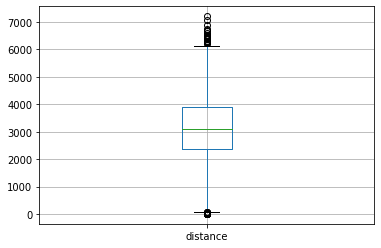

In [52]:
users_free.boxplot('distance') #выведем диаграмму размаха
plt.show()

На диаграмме размаха можем наблюдать медиану около 3000 м. Имеются выбросы, не являющиеся аномалиями. 

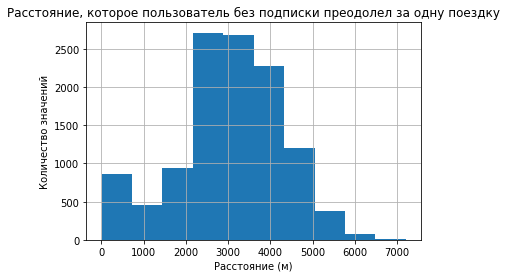

In [53]:
users_free.hist('distance') #выведем гистограмму
plt.title('Расстояние, которое пользователь без подписки преодолел за одну поездку')
plt.ylabel('Количество значений')
plt.xlabel('Расстояние (м)')
plt.show()

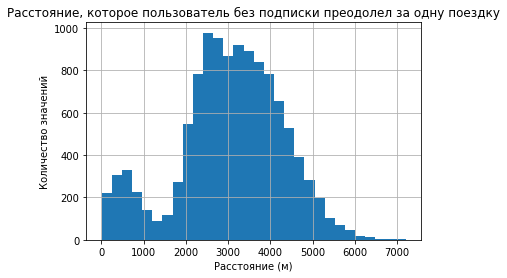

In [54]:
users_free.hist('distance', bins=30) #выведем гистограмму
plt.title('Расстояние, которое пользователь без подписки преодолел за одну поездку')
plt.ylabel('Количество значений')
plt.xlabel('Расстояние (м)')
plt.show()

По гистограмме видно, что данные распределены нормально в двух областях графика - от 0 до 1500 м, и от 1500 м до 7100 м.  
В первом случае большинство пользователей совершает поездки на расстояние около 600-700 м, во втором - большинство пользователей совершает поездки на расстояние около 2500-2600 м, следующее по частоте значение - около 2800 м, далее - около 3200.  

In [55]:
users_free['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

Средняя продолжительность поездки для пользователей без подписки составляет около 17,3 минут. Минимальное значение - 0.5 минут (30 секунд), максимальное - 34.9 минут.

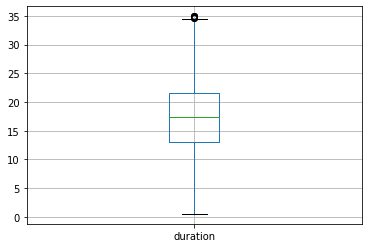

In [56]:
users_free.boxplot('duration') #выведем диаграмму размаха
plt.show()

На диаграмме размаха мы можем наблюдать расположение нормальных значений от 0.5 до 34 минут и незначительные выбросы, превышающие 34 минуты. Медиана находится на значении около 17 минут.

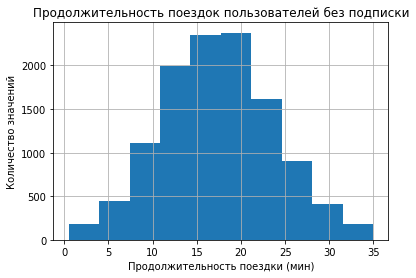

In [57]:
users_free.hist('duration') #выведем гистограмму
plt.title('Продолжительность поездок пользователей без подписки')
plt.ylabel('Количество значений')
plt.xlabel('Продолжительность поездки (мин)')
plt.show()

На гистограмме мы видим нормальное распределение. Большинство пользователей тратят на поездку от 17 до 21 минут, чуть меньше пользователей тратят от 14 до 17 минут. Меньше всего пользователей тратят на поездки от 0.5 до 4 минут, что выглядит логично, т.к. немногие пользователи совершают такие короткие поездки.

In [58]:
users_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

По пользователям с подпиской мы получили 6500 строк данных. В среднем пользователи совершали поездки на расстояние около 3100 м (среднее 3115 м, медиана 3148 м). Минимальное расстояние - 244 м, максимальное - 5699.7 м.

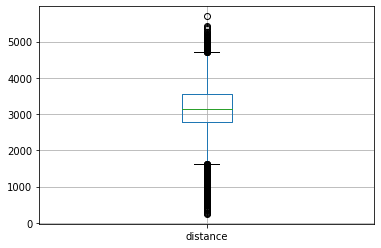

In [59]:
users_ultra.boxplot('distance') #выведем диаграмму размаха
plt.show()

На диаграмме размаха можем наблюдать медиану около 3100 м. Имеются значительные выбросы, не являющиеся аномалиями.

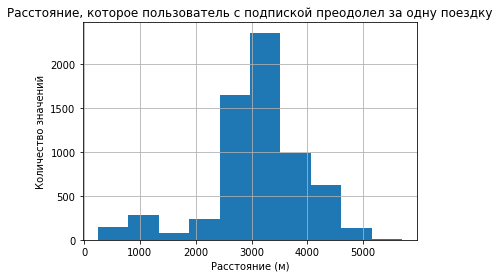

In [60]:
users_ultra.hist('distance') #выведем гистограмму
plt.title('Расстояние, которое пользователь с подпиской преодолел за одну поездку')
plt.ylabel('Количество значений')
plt.xlabel('Расстояние (м)')
plt.show()

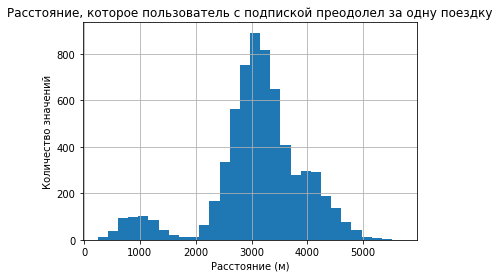

In [61]:
users_ultra.hist('distance', bins=30) #выведем гистограмму
plt.title('Расстояние, которое пользователь с подпиской преодолел за одну поездку')
plt.ylabel('Количество значений')
plt.xlabel('Расстояние (м)')
plt.show()

По гистограмме видно, что данные распределены нормально в двух областях графика - от 200 до 1800 м, и от 1800 м до 5600 м.
В первом случае большинство пользователей совершает поездки на расстояние около 1000 м, во втором - большинство пользователей совершает поездки на расстояние около 3000-3100 м, следующее по частоте значение - около 3200 м, далее - около 2800.

In [62]:
users_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

Средняя продолжительность поездки для пользователей с подпиской составляет около 18 минут (среднее 18.5, медиана 18.17). Минимальное значение - 3.7 минут, максимальное - 40.8 минут.

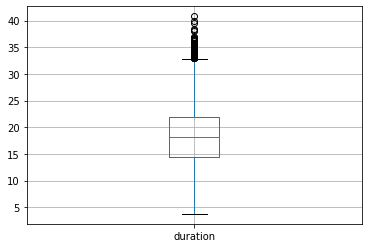

In [63]:
users_ultra.boxplot('duration') #выведем диаграмму размаха
plt.show()

На диаграмме размаха мы можем наблюдать расположение нормальных значений от 3 до 34 минут и выбросы, превышающие 34 минуты. Медиана находится на значении около 18 минут.

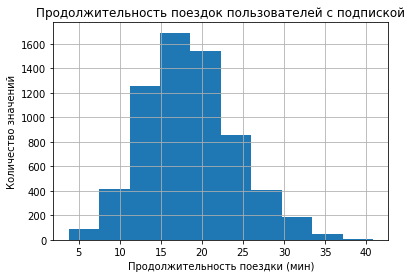

In [64]:
users_ultra.hist('duration') #выведем гистограмму
plt.title('Продолжительность поездок пользователей с подпиской')
plt.ylabel('Количество значений')
plt.xlabel('Продолжительность поездки (мин)')
plt.show()

По гистограмме мы видим, что большинство пользователей тратят на поездку от 15 до 18 минут, чуть меньше пользователей тратят от 18 до 23 минут. Меньше всего пользователей тратят на поездки от 3 до 7 минут.

**Вывод:** На данном этапе мы объединили три датафрейма в один, а также разделили полученный датафрейм на два отдельных : c данными о пользователях без подписки и с данными о пользователях с подпиской. Отсортированные данные позволили рассмотреть разницу расстояния и времени для пользователей без подписки и с подпиской.  
Пользователи без подписки в среднем тратят 17.3 минуты на расстояние около 3000 м, при этом и для времени, и для расстояния минимальные значения у них меньше, а максимальные больше, чем у пользователей с подпиской.  
Пользователи с подпиской в среднем тратят 18 минут на расстояние около 3100 м, при этом и для времени, и для расстояния минимальные значения у них больше, а максимальные меньше, чем у пользователей без подписки. 

### Подсчёт выручки

**5.1 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4 (найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц)**

In [65]:
#продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округлим до следующего целого числа
data['duration'] = np.ceil(data['duration'])

In [66]:
#создадим сводную таблицу с агрегированными данными
data_agg = data.pivot_table(index=['user_id', 'month', 'subscription_type'], values=['distance','duration', 'minute_price', 'start_ride_price','subscription_fee'], aggfunc={'count','sum'})

In [67]:
# переименуем столбцы
data_agg.columns = ['trips_count', 'total_distance', 
                    'time_count', 'total_time', 
                    'minute_price_count', 'minute_price_sum', 
                    'rides_total', 'start_ride_price', 
                    'months_subscribed', 'subscription_fee'
                   ]

In [68]:
data_agg['minute_price'] = data_agg['minute_price_sum'] / data_agg['minute_price_count'] #приведем столбец с ценой за минуту к исходному значению

In [69]:
data_agg['subscription_fee'] = data_agg['subscription_fee']/ data_agg['trips_count'] #приведем столбец с стоимостью подписки к исходному значению

In [70]:
data_agg['start_ride_price'] = data_agg['start_ride_price'] / data_agg['trips_count'] #приведем столбец с ценой за начало поездки к исходному значению

In [71]:
data_agg.drop(['time_count', 'minute_price_count', 'minute_price_sum', 'rides_total', 'months_subscribed'], axis= 1 , inplace= True ) #удалим лишние столбцы

In [72]:
data_agg.head(10) #выведем первые 10 строк полученного датафрейма

trips_count  total_distance  total_time  \
user_id month subscription_type                                            
1       1     ultra                        2     7027.511294        42.0   
        4     ultra                        1      754.159807         7.0   
        8     ultra                        2     6723.470560        46.0   
        10    ultra                        2     5809.911100        32.0   
        11    ultra                        3     7003.499363        56.0   
        12    ultra                        2     6751.629942        28.0   
2       3     ultra                        3    10187.723006        63.0   
        4     ultra                        2     6164.381824        40.0   
        6     ultra                        1     3255.338202        14.0   
        7     ultra                        2     6780.722964        48.0   

                                 start_ride_price  subscription_fee  \
user_id month subscription_type                                       
1       1     ultra                           0.0             199.0   
        4     ultra                           0.0             199.0   
        8     ultra                           0.0             199.0   
        10    ultra                           0.0             199.0   
        11    ultra                           0.0             199.0   
        12    ultra                           0.0             199.0   
2       3     ultra                           0.0             199.0   
        4     ultra                           0.0             199.0   
        6     ultra                           0.0             199.0   
        7     ultra                           0.0             199.0   

                                 minute_price  
user_id month subscription_type                
1       1     ultra                       6.0  
        4     ultra                       6.0  
        8     ultra                       6.0  
        10    ultra                       6.0  
        11    ultra                       6.0  
        12    ultra                       6.0  
2       3     ultra                       6.0  
        4     ultra                       6.0  
        6     ultra                       6.0  
        7     ultra                       6.0

Получились следующие столбцы:  
user_id - уникальный номер пользователя;  
month - месяц использования сервиса;  
subscription_type - тип подписки (без подписки - free, с подпиской - ultra);  
trips_count	- сколько всего было поездок;  
total_distance - общее расстояние за поездку;  
total_time - общее время поездок;   
start_ride_price - цена за начало поездки;   
subscription_fee - плата за подписку;  
minute_price - цена за одну минуту

In [73]:
data_agg.isna().sum() #проверим сводную таблицу на пропуски

trips_count         0
total_distance      0
total_time          0
start_ride_price    0
subscription_fee    0
minute_price        0
dtype: int64

Пропусков нет

**5.2 В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки**

Помесячная выручка считается по формуле: стоимость старта поездки 
×  количество поездок + стоимость одной минуты поездки 
× общая продолжительность всех поездок в минутах + стоимость подписки.

In [74]:
#рассчитаем помесячную выручку для каждого пользователя и добавим в отдельный столбец
data_agg['monthly_revenue'] = data_agg['start_ride_price'] * data_agg['trips_count'] + data_agg['minute_price'] * data_agg['total_time'] + data_agg['subscription_fee']

In [75]:
data_agg.head(10) #выведем первые десять строк обновленного датафрейма

trips_count  total_distance  total_time  \
user_id month subscription_type                                            
1       1     ultra                        2     7027.511294        42.0   
        4     ultra                        1      754.159807         7.0   
        8     ultra                        2     6723.470560        46.0   
        10    ultra                        2     5809.911100        32.0   
        11    ultra                        3     7003.499363        56.0   
        12    ultra                        2     6751.629942        28.0   
2       3     ultra                        3    10187.723006        63.0   
        4     ultra                        2     6164.381824        40.0   
        6     ultra                        1     3255.338202        14.0   
        7     ultra                        2     6780.722964        48.0   

                                 start_ride_price  subscription_fee  \
user_id month subscription_type                                       
1       1     ultra                           0.0             199.0   
        4     ultra                           0.0             199.0   
        8     ultra                           0.0             199.0   
        10    ultra                           0.0             199.0   
        11    ultra                           0.0             199.0   
        12    ultra                           0.0             199.0   
2       3     ultra                           0.0             199.0   
        4     ultra                           0.0             199.0   
        6     ultra                           0.0             199.0   
        7     ultra                           0.0             199.0   

                                 minute_price  monthly_revenue  
user_id month subscription_type                                 
1       1     ultra                       6.0            451.0  
        4     ultra                       6.0            241.0  
        8     ultra                       6.0            475.0  
        10    ultra                       6.0            391.0  
        11    ultra                       6.0            535.0  
        12    ultra                       6.0            367.0  
2       3     ultra                       6.0            577.0  
        4     ultra                       6.0            439.0  
        6     ultra                       6.0            283.0  
        7     ultra                       6.0            487.0

In [76]:
data_agg

trips_count  total_distance  total_time  \
user_id month subscription_type                                            
1       1     ultra                        2     7027.511294        42.0   
        4     ultra                        1      754.159807         7.0   
        8     ultra                        2     6723.470560        46.0   
        10    ultra                        2     5809.911100        32.0   
        11    ultra                        3     7003.499363        56.0   
...                                      ...             ...         ...   
1534    6     free                         2     3409.468534        26.0   
        8     free                         2     7622.453034        48.0   
        9     free                         1     4928.173852        23.0   
        11    free                         4    13350.015305        78.0   
        12    free                         1     2371.711192        16.0   

                                 start_ride_price  subscription_fee  \
user_id month subscription_type                                       
1       1     ultra                           0.0             199.0   
        4     ultra                           0.0             199.0   
        8     ultra                           0.0             199.0   
        10    ultra                           0.0             199.0   
        11    ultra                           0.0             199.0   
...                                           ...               ...   
1534    6     free                           50.0               0.0   
        8     free                           50.0               0.0   
        9     free                           50.0               0.0   
        11    free                           50.0               0.0   
        12    free                           50.0               0.0   

                                 minute_price  monthly_revenue  
user_id month subscription_type                                 
1       1     ultra                       6.0            451.0  
        4     ultra                       6.0            241.0  
        8     ultra                       6.0            475.0  
        10    ultra                       6.0            391.0  
        11    ultra                       6.0            535.0  
...                                       ...              ...  
1534    6     free                        8.0            308.0  
        8     free                        8.0            484.0  
        9     free                        8.0            234.0  
        11    free                        8.0            824.0  
        12    free                        8.0            178.0  

[11331 rows x 7 columns]

**Вывод:** на данном этапе мы создали датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными (нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц), в этот же датафрейм добавили столбец с помесячной выручкой, которую принёс каждый пользователь.

### Проверка гипотез

**6.1 Тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки**

Нулевая гипотеза: средняя продолжительность поездок для пользователей с подпиской и без подписки равна.  
Альтернативная гипотеза: пользователи с подпиской тратят больше времени на поездки.  
Используем двухвыборочный t-test для независимых выборок

In [77]:
duration_ultra = users_ultra['duration'] #значения для пользователей с подпиской
duration_free = users_free['duration'] #значения для пользователей без подписки
alpha = 0.05 #уровень статистической значимости
#проверяем гипотезу о равенстве средних двух генеральных совокупностей
results = st.ttest_ind(duration_ultra, duration_free, equal_var=False, alternative='greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 5.6757813771289775e-37
Отвергаем нулевую гипотезу


**Вывод:** Отвергаем нулевую гипотезу, следовательно, пользователи с подпиской тратят больше времени на поездки

**6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу**

Нулевая гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров.  
Альтернативная гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров.  
Используем одновыборочный t-test о равенстве среднего генеральной совокупности числу

In [78]:
distance_ultra = users_ultra['distance'] #значения для пользователей с подпиской
alpha = 0.05 #уровень статистической значимости
results = st.ttest_1samp(distance_ultra, 3130, alternative='greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Не получилось отвергнуть нулевую гипотезу, следовательно, среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров

**6.3 Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки**

Нулевая гипотеза: помесячная выручка от пользователей с подпиской и без подписки равна.  
Альтернативная гипотеза: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.  
Используем двухвыборочный t-test для независимых выборок

In [80]:
monthly_revenue_free = data_agg[data_agg['subscription_fee'] == 0]['monthly_revenue'] #значения для пользователей без подписки
monthly_revenue_ultra = data_agg[data_agg['subscription_fee'] > 0]['monthly_revenue'] #значения для пользователей с подпиской
alpha = 0.05 #уровень статистической значимости
#проверяем гипотезу о равенстве средних двух генеральных совокупностей
results = st.ttest_ind(monthly_revenue_ultra,monthly_revenue_free,  equal_var=False, alternative='greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 8.874140893976874e-40
Отвергаем нулевую гипотезу


**Вывод:** Получилось отвергнуть нулевую гипотезу, следовательно, помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

**6.4 Представим ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест нам понадобился бы для проверки этой гипотезы?**

Нулевая гипотеза: количество обращений в техподдержку до и после обновлений равно  
Альтернативная гипотеза: количество обращений в техподдержку значимо снизилось  
Для этой гипотезы нам понадобился бы двухвыборочный t-test для зависимых (парных) выборок:  st.ttest_rel(before, after) - в параметрах указываем набор данных до и после обновлений

**Общий вывод:**  
Для анализа были получены три датафрейма с данными о пользователях, поездках и типах подписки сервиса GoFast. На этапе предобработки данных были найдены, изучены и, по возможности, устранены пропуски, дубликаты, преобразованы типы данных. В представленных датафреймах можем наблюдать данные о пользователях из 8 городов. Максимальное количество пользователей (219) из Пятигорска, второй по численности (204) – Екатеринбург. Минимальное количество пользователей (168) из Москвы.  
Большую часть пользователей составили пользователи без подписки (835), пользователей с подпиской 699. Минимальный возраст пользователя 12 лет, максимальный – 43 года. По медиане (25) и среднему (24,9) видно, что возраст большей части пользователей около 25 лет. Большинство пользователей совершает поездки на расстояние около 3000 м. В среднем пользователи тратят на поездку 17-18 минут (среднее 17.8, медиана 17,6).  
Изученные данные позволили составить портрет среднестатистического пользователя сервиса GoFast: возраст около 25 лет, проживает в Пятигорске или Екатеринбурге, не пользуется платной подпиской, совершает поездки на расстояние около 3000 м и тратит на них 17-18 минут.  
Если рассматривать разницу расстояния и времени для пользователей без подписки и с подпиской, картина выглядит следующим образом:  
Пользователи без подписки в среднем тратят 17.3 минуты на расстояние около 3000 м, при этом и для времени, и для расстояния минимальные значения у них меньше, а максимальные больше, чем у пользователей с подпиской.  
Пользователи с подпиской в среднем тратят 18 минут на расстояние около 3100 м, при этом и для времени, и для расстояния минимальные значения у них больше, а максимальные меньше, чем у пользователей без подписки.  
Далее был создан датафрейм с агрегированными данными о поездках, включающий в себя суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц), в этот же датафрейм добавлен столбец с рассчитанной помесячной выручкой, которую принёс каждый пользователь.  
Наконец, было проведено три t-теста на проверку гипотез:  
1) В первом случае был использован двухвыборочный t-test для независимых выборок для проверки (нулевой) гипотезы о том, что средняя продолжительность поездок для пользователей с подпиской и без подписки равна, (альтернативная гипотеза заключалась в том, что пользователи с подпиской тратят больше времени на поездки). Нулевая гипотеза была отвергнута. 
2) Далее был использован одновыборочный t-test о равенстве среднего генеральной совокупности числу для проверки гипотезы о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров, (альтернативная гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров). Нулевую гипотезу отвергнуть не удалось.  
3) Затем был использован двухвыборочный t-test для независимых выборок для проверки гипотезы о том, что помесячная выручка от пользователей с подпиской и без подписки равна, (альтернативная гипотеза: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки). Не получилось отвергнуть нулевую гипотезу.  

Исходя из проведенной проверки гипотез, можно сделать вывод, что пользователи с подпиской для компании выгоднее, т.к тратят на поездки больше времени. С одной стороны бизнесу стоит сосредоточиться на распространении платной подписки среди клиентов без подписки, чтобы увеличить прибыль в данном сегменте. С другой стороны, среди пользователей без подписки больше минимальных значений по времени и расстоянию, следовательно, они стремятся как можно быстрее завершить поездку, чтобы сэкономить. Возможно, стоит также пересмотреть условия в тарифе без подписки, чтобы эти клиенты были более заинтересованы в длительных поездках и, как следствие, тратили больше денег.
